In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

In [2]:
data = pd.read_csv('../data/Student_performance_data.csv')
print(data.head(3))

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3.042915         1.0  
2             0  0.112602         4.0  


In [3]:
'''
variables = ['StudentID','Age','Gender','Ethnicity',
    'ParentalEducation','StudyTimeWeekly','Absences',
    'Tutoring','ParentalSupport','Extracurricular',
    'Sports','Music','Volunteering','GPA','GradeClass']
'''

"\nvariables = ['StudentID','Age','Gender','Ethnicity',\n    'ParentalEducation','StudyTimeWeekly','Absences',\n    'Tutoring','ParentalSupport','Extracurricular',\n    'Sports','Music','Volunteering','GPA','GradeClass']\n"

In [4]:
feature = np.array(['ParentalSupport'])

target = np.array(['GPA'])

x = data[feature]
print(x.head(5))

y = data[target]
print(y.head(5))

In [6]:
#random_state = None gives Random data split everytime executed
X,x_test,Y,y_test = train_test_split(x,y,train_size=0.2,random_state= None)
x_train,x_cv,y_train,y_cv = train_test_split(X,Y,train_size=0.2,random_state=None)

Text(0.5, 0, 'ParentalSupport')

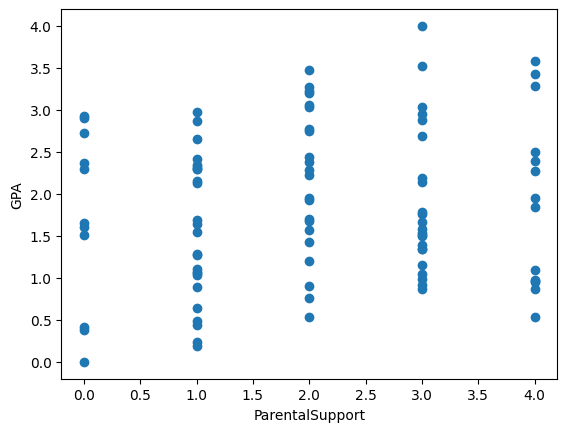

In [7]:
plt.scatter(x_train,y_train)
plt.ylabel('GPA')
plt.xlabel('ParentalSupport')

<h1>Linear Regression</h1>

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_cv)
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_cv,y_pred)
r2 = r2_score(y_cv,y_pred)
score = model.score(x_cv,y_cv)

print(f'mean square error: {mse}')
print(f'r2 score: {r2}')
print(f'score: {score}')
y_pred2 = model.predict(x_test )
for i in range(5):
    print(f"Predicted: {y_pred2[i]}, Actual: {y_test['GPA'].iloc[i]}")


'from sklearn.linear_model import LinearRegression\nmodel = LinearRegression()\nmodel.fit(x_train,y_train)\n\ny_pred = model.predict(x_cv)\nfrom sklearn.metrics import mean_squared_error,r2_score\n\nmse = mean_squared_error(y_cv,y_pred)\nr2 = r2_score(y_cv,y_pred)\nscore = model.score(x_cv,y_cv)\n\nprint(f\'mean square error: {mse}\')\nprint(f\'r2 score: {r2}\')\nprint(f\'score: {score}\')\ny_pred2 = model.predict(x_test )\nfor i in range(5):\n    print(f"Predicted: {y_pred2[i]}, Actual: {y_test[\'GPA\'].iloc[i]}")\n'

<h1>Random Forest</h1>

In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(x_train, y_train)

y_cv_pred = regressor.predict(x_cv)

mse = mean_squared_error(y_cv,y_cv_pred)
r2 = r2_score(y_cv,y_cv_pred)
score = regressor.score(x_cv,y_cv)

print(f'mean square error: {mse}')
print(f'r2 score: {r2}')
print(f'score: {score}')

y_test_pred = regressor.predict(x_test).round(3).clip(0,4)
for i in range(5):
    print(f"Predicted: {y_test_pred[i]}, Actual: {y_test['GPA'].iloc[i].round(3)}")

mean square error: 0.8284170096748094
r2 score: -0.07417009507681649
score: -0.07417009507681649
Predicted: 2.036, Actual: 2.211
Predicted: 1.939, Actual: 2.529
Predicted: 1.827, Actual: 1.22
Predicted: 2.036, Actual: 2.637
Predicted: 1.827, Actual: 2.49


/home/aashish/Desktop/AcademicPerformancePrediction/venv_predict/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aashish/Desktop/AcademicPerformancePrediction/venv_predict/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


<h1>
Decission Tree
</h1>

In [10]:
from sklearn.tree import DecisionTreeRegressor
decission_regression = DecisionTreeRegressor(max_depth=15)

decission_regression.fit(x_train,y_train)

y_cv_pred = decission_regression.predict(x_cv)

mse = mean_squared_error(y_cv,y_cv_pred)
r2 = r2_score(y_cv,y_cv_pred)
score = decission_regression.score(x_cv,y_cv)

print(f'mean square error: {mse}')
print(f'r2 score: {r2}')
print(f'score: {score}')

y_test_pred = decission_regression.predict(x_test).round(3).clip(0,4)
for i in range(5):
    print(f"Predicted: {y_test_pred[i]}, Actual: {y_test['GPA'].iloc[i].round(3)}")

mean square error: 0.8380184177906508
r2 score: -0.08661979776062934
score: -0.08661979776062934
Predicted: 2.171, Actual: 2.211
Predicted: 1.902, Actual: 2.529
Predicted: 1.904, Actual: 1.22
Predicted: 2.171, Actual: 2.637
Predicted: 1.904, Actual: 2.49
